In [18]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import warnings
import pandas as pd
import random

In [4]:
# Get some intuition into Euclidean distance
from math import sqrt
plot1 = [1, 3]
plot2 = [2, 5]
euclidean_distance = sqrt( (plot1[0] - plot2[0])**2 + (plot1[1] - plot2[1])**2 )
print(euclidean_distance)

2.2360679775


In [6]:
style.use('fivethirtyeight')

In [8]:
# Create sample dataset
dataset = {'k': [[1, 2], [2, 3], [3, 1]],
           'r': [[6, 5], [7, 7], [8, 6]]}
new_features = [5, 7]

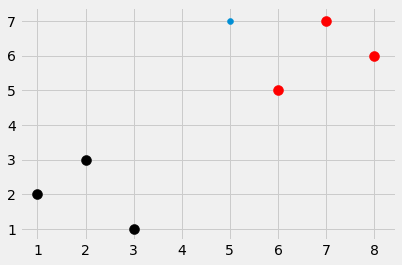

In [10]:
# Visualise the data
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0], ii[1], s=100, color=i)
plt.scatter(new_features[0], new_features[1])
plt.show() 

In [50]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups k!')
        
    distances = []
    for group in data:
        for features in data[group]:
            #euclidean_distance = np.sqrt(np.sum(np.array(features) - np.array(predict))**2)
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / float(k)
    
    return vote_result, confidence

In [51]:
result, _ = k_nearest_neighbors(dataset, new_features, k=3)
print(result)

r


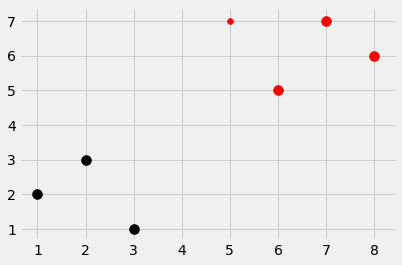

In [17]:
# Plot the results
# Visualise the data
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0], ii[1], s=100, color=i)
plt.scatter(new_features[0], new_features[1], color=result)
plt.show() 

In [46]:
# Apply custom KNN function to Breast Cancer dataset
df = pd.read_csv('./data/breast-cancer-wisconsin.data.csv')
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

In [53]:
full_data = df.astype(float).values.tolist()
random.shuffle(full_data)
test_size = 0.4
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [54]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [55]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        else:
            print(confidence)
        total += 1

# Accuracy: did the classifier get it right?
print('Accuracy: ', float(correct) / total)

0.8
0.6
1.0
0.6
0.6
0.6
0.8
0.8
('Accuracy: ', 0.9713261648745519)
